In [1]:
pwd

'D:\\Proj_OCR'

In [25]:
import cv2
import torch
from PIL import Image
import cv2
import torch
from PIL import Image
import glob
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.image as mpimg
import os
from pyzbar.pyzbar import decode
from pyzbar import pyzbar
import cv2
import glob
from tqdm import tqdm
from barcode import EAN13
from barcode.writer import ImageWriter
import matplotlib.pyplot as plt

import cv2
import torch
from PIL import Image

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

from pylibdmtx.pylibdmtx import decode as decodeMatrix
from PIL import Image

%matplotlib inline

In [3]:
#YOLO model loading - detect locations of labels
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./best_sticker_OCR_All.pt')
model.iou = 0.1
print(type(model))

Using cache found in C:\Users\sendr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-9 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


<class 'models.common.AutoShape'>


In [29]:
img = cv2.imread('./Sample_Images/sticker_213.jpg')
decod_result = decodeMatrix(img)
data = str(decod_result[0][0]).split(' {')
metadata = decod_result[0][1]

In [30]:
data

["b'3076830744",
 '800',
 'PCE',
 '40X003',
 '2141',
 '01',
 'CLN2193709',
 '722040800201',
 "20220408000001'"]

In [31]:
metadata

Rect(left=415, top=809, width=-282, height=-315)

True

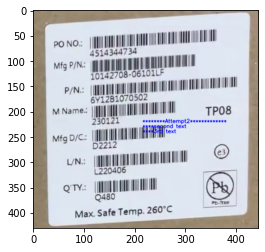

In [90]:
img = cv2.imread(r'./Sample_Images/sticker_342.jpg')
h,w,_ = img.shape
#start_point = (metadata.left + metadata.width , h-metadata.top)
#end_point = (metadata.left , h-metadata.top - metadata.height )

#cv2.rectangle(image, start_point, end_point, color, thickness)
thickness = int(0.01*h)
cv2.rectangle (img, start_point, end_point, (0,0,255), thickness)
text = '********Attempt2*************'
fontsize = float(1/1280*w)

a = h//2
b = w//2

cv2.putText(img, text, (a,b), cv2.FONT_HERSHEY_SIMPLEX, fontsize, (255,0,0), 1, cv2.LINE_AA)
b += int(30/1280*w)
text = '****second text'
cv2.putText(img, text, (a,b), cv2.FONT_HERSHEY_SIMPLEX, fontsize , (255,0,0), 1, cv2.LINE_AA)
text = '****3rd text'
b += int(30/1280*w)
cv2.putText(img, text, (a,b), cv2.FONT_HERSHEY_SIMPLEX, fontsize , (255,0,0), 1, cv2.LINE_AA)



%matplotlib inline
plt.imshow(img[:,:,::-1])
cv2.imwrite('./Sample_Images/test2132.jpg',img)

In [69]:
h*w

1165860

In [ ]:
def readDataMatrix (stickerObject):
    
    img = stickerObject.image
    
    from pylibdmtx.pylibdmtx import decode as decodeMatrix
    decod_result = decodeMatrix (img)
    
    data = str(decod_result[0][0]).split(' {')
    metadata = decod_result[0][1]
    
    h,w,_ = img.shape
    
    start_point = (metadata.left + metadata.width , h-metadata.top)
    end_point = (metadata.left , h-metadata.top - metadata.height )
    
    thickness = int(0.01*h)
    
    cv2.rectangle (img, start_point, end_point, (0,0,255), factor)
    

In [110]:
#Sekali inisiasi objek, langsung dapat semua data

class DataMatrix:
    def __init__ (self, stickerImage, decodedData):
        self.Data = str(decodedData[0][0]).split(' {')
        self.MetaData = decodedData[0][1]
        self.Image = stickerImage
        
        #Extract Information
        self.PN = int(self.Data[0].split("'")[-1])
        self.QTY = int(self.Data[1])
        self.VENDOR = self.Data[3]
        self.DC = int(self.Data[4])
        self.Other = [self.Data[5], self.Data[6], self.Data[7]]
        
        # What & Where to Write: bounding box and write the info
        #Text
        self.TextList = ['VENDOR:'+str(self.VENDOR),
                        'P/N:'+str(self.PN), 
                         'QTY:'+str(self.QTY), 
                         'D/C: '+str(self.DC), 
                         "Other_Info: ",
                         str(self.Other[0]),
                         str(self.Other[1]),
                         str(self.Other[2])]
        #Bounding Box
        h,w,_ = stickerImage.shape
        start_point = (self.MetaData.left + self.MetaData.width,h-self.MetaData.top)
        end_point = (self.MetaData.left, h-self.MetaData.top - self.MetaData.height)
        
        thickness = int(0.01*h)
        
        #Draw rectangle
        cv2.rectangle (stickerImage, start_point, end_point, (0,0,255), thickness)
        
        start_point2 = (self.MetaData.left + self.MetaData.width, h-self.MetaData.top - self.MetaData.height)
        end_point2 = (self.MetaData.left + self.MetaData.width, h-self.MetaData.top - self.MetaData.height-self.MetaData.height//2)
        cv2.line(stickerImage, start_point2, end_point2, (0,0,255), thickness)
        
        a = end_point2 [0]
        b = end_point2 [1]
        
        fontsize = float(1/1280*w)
        
        i = 0
        for text in self.TextList:
            cv2.putText(stickerImage, text, (a,b), cv2.FONT_HERSHEY_SIMPLEX, fontsize, (255,0,0), 1, cv2.LINE_AA)
            b += int(30/1280*w)
            i +=0
 

In [111]:
files  =glob.glob('./Sample_Images/DataMatrix/*.jpg')

imgs = []

for file in tqdm(files):
    imgs.append(cv2.imread(file))
    

data_matrix_list = []


for i in tqdm(range (len(imgs))):
    decod_result = decodeMatrix (imgs[i])
    data_matrix_list.append (DataMatrix(imgs[i], decod_result))
    
#output result
i = 0
for data_matrix in tqdm(data_matrix_list):
    cv2.imwrite('res_'+str(i)+'.jpg',data_matrix.Image)
    i +=1

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 114.82it/s]


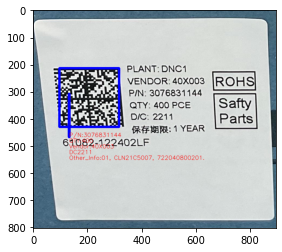

In [102]:
plt.imshow(data_matrix_list[1].Image)

In [ ]:
for img in tqdm(imgs):
    cv2.imwrite('res_'+str(i)+'.jpg',img)
    i +=1

In [97]:
pwd

'D:\\Proj_OCR'

In [ ]:
# Functions

# binarizing image alg.
def binarizeImage (image, tresh_value = 127):
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, tresh_value, 255, cv2.THRESH_BINARY)
    #plt.imshow(blackAndWhiteImage)
    return blackAndWhiteImage

# read OCR algorithm
def readOCR(image):
        total_letter = ''
        hImg, wImg, _ = image.shape  
        #hImg, wImg = binarizedImage.shape
        #image = binarizeImage (image, treshold)
        boxes = pytesseract.image_to_boxes(image)
        total_letter = ''
        
        for b in boxes.splitlines():
            b = b.split(' ')
            x,y,w,h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
            start_point = (x, hImg -y)
            end_point = (w, hImg -h)
            mid_point = ((x+w)//2, (start_point[1]+end_point[1])//2)
            write_point = (mid_point[0],end_point[1])
            total_letter+=b[0]
            
        return total_letter
    
# read OCR algorithm2: alternative    
def readOCRBinary(binarizedImage):
        total_letter = ''
        #hImg, wImg, _ = image.shape  
        hImg, wImg = binarizedImage.shape
        #image = binarizeImage (image, treshold)
        boxes = pytesseract.image_to_boxes(image)
        total_letter = ''
        
        for b in boxes.splitlines():
            b = b.split(' ')
            x,y,w,h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
            start_point = (x, hImg -y)
            end_point = (w, hImg -h)
            mid_point = ((x+w)//2, (start_point[1]+end_point[1])//2)
            write_point = (mid_point[0],end_point[1])
            total_letter+=b[0]
            
        return total_letter

# read barcode: only 1D, 2D QR work, 2D matrix not work   
def readBarcode (stickerObject): 
    barcodes = decode(stickerObject.binarizedImage)
    

    if (len(barcodes) > 0):
        print ('Barcode detected')
        k = 0
        for barcode in barcodes:
        
            (x, y, w, h) = barcode.rect
        #cv2.rectangle(originalImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
            barcodeData = barcode.data.decode("utf-8")
            barcodeType = barcode.type
            barcode_object = Barcode(barcodeData, barcodeType, [(x, y), (x + w, y + h)])
        
            stickerObject.barcodeList.append(barcode_object)
        
        #list_locationPoints.append(((x, y), (x + w, y + h)))
        
        #list_barcodeData.append(barcodeData)
        
        #list_barcodeType.append(barcodeType)
            
            text = "{} ({})".format(barcodeData, barcodeType)
        
        #text = "{}".format(barcodeData)
            bbObject = BoundingBox((x, y), (x + w, y + h), text)
        
            stickerObject.barcodeList[k].boundingBox = bbObject
        
            cv2.putText(stickerObject.image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 127, 255), 1)
            cv2.rectangle(stickerObject.image, (x, y),  (x + w, y + h), (255, 127, 255), 1)
            k +=1

    else:
        print ('1D/2D Barcode not detected')
    

    

class Sticker:
    def __init__(self, image = None):
        #general identity
        self.image = image
        self.binarizedImage = binarizeImage(image)
        
        #OCR purpose
        self.results = []
        self.Attributes = []
        self.Contents = []
        
        #Barcode purpose
        self.barcodeList = []
        
        
class StickerType2:
    def __init__(self, image = None):
        #general identity
        self.image = image
        self.binarizedImage = binarizeImage(image)
        
        #OCR purpose
        self.results = []
        self.Attributes = []
        self.Contents = []
        
        #DataMatrix purpose
        self.DMVendor = None
        self.DMPN = None
        self.DMQTY = None
        self.DMDC = None
        self.OtherInfo = []
        
    
'''class Data:
    def __init__(self, Attribute, Content):
        self.Attribute = None
        self.Content = None'''




## OCR Purpose        
class Attribute:
    def __init__(self, start_point, end_point, middle_point, image):    
        self.start_point = start_point
        self.end_point = end_point
        self.middle_point = middle_point
        
        self.xmin = start_point[0]
        self.ymin = start_point[1]
        
        self.xmax = end_point[0]
        self.ymax = end_point[1]
        
        self.xmid = (self.xmin + self.xmax)//2
        self.ymid = (self.ymin + self.ymax)//2
        
        self.image = image[ymin:ymax,xmin:xmax]
        
        self.binarizedImage = None
        self.OCR = None
        self.WriteSpot = (self.xmid, self.ymin)
        
        
       
class Content:
    def __init__(self, start_point, end_point, middle_point, image):       
        self.start_point = start_point
        self.end_point = end_point
        self.middle_point = middle_point
        
        self.xmin = start_point[0]
        self.ymin = start_point[1]
        
        self.xmax = end_point[0]
        self.ymax = end_point[1]
        
        self.xmid = (self.xmin + self.xmax)//2
        self.ymid = (self.ymin + self.ymax)//2
        
        self.image = image [ymin:ymax,xmin:xmax]
        
        self.binarizedImage = None
        self.OCR = None
        self.WriteSpot = (self.xmax, self.ymid)
        #self.WriteSpot = (xmax, ymid)
        
        
# Barcode Purpose: 1d and 2d
class Barcode:
    def __init__(self,  barcodeContent, barcodeType, originAddress):
        self.barcodeContent = barcodeContent
        self.barcodeType = barcodeType
        self.boundingBox = None
        

class BoundingBox:
     def __init__(self, initPosition, finalPosition, theText):
         self.initPosition = initPosition
         self.finalPosition = finalPosition
         self.theText = theText
         self.color = (0,0,255)
    